In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


haberman = list(files.upload())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving haberman.csv to haberman.csv


In [51]:
data = pd.read_csv("haberman.csv")
data.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [50]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [56]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**2-D Scatter Plot**

In [0]:
import warnings
warnings.filterwarnings("ignore")

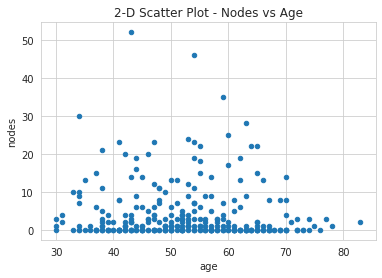

In [59]:
data.plot(kind='scatter', x='age', y='nodes') ;
plt.title("2-D Scatter Plot - Nodes vs Age")
plt.show()

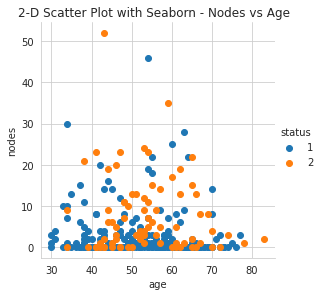

In [68]:
#2-D scatter plot with color coding

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D Scatter Plot with Seaborn - Nodes vs Age  ")
plt.show();

#Here also we can not differentiate between status 1 an 2

**Pair Code**

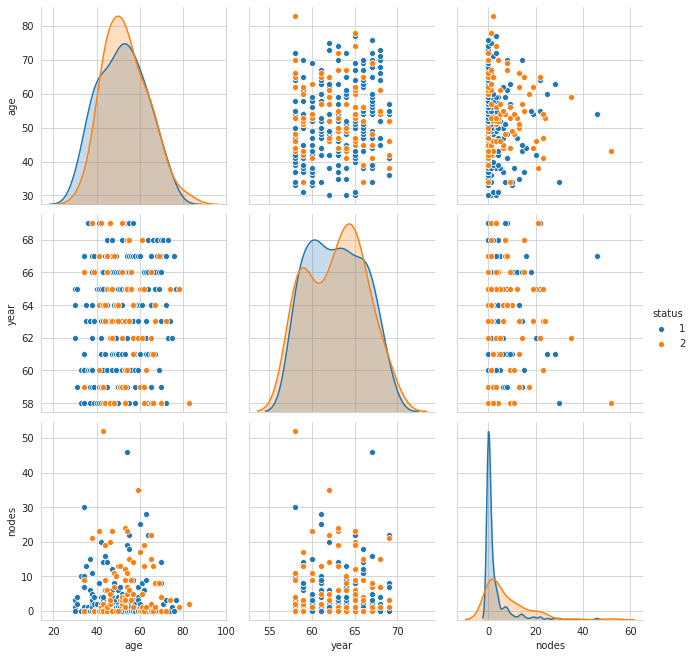

In [17]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", size=3);
plt.show()

In [0]:
#Above plots are the combinations of threee features i.e age, year and nodes
#Plots 1,5 and 9 are the PDFs representations of the three features
#In plots 2,4,6 and 8 we can clearly see the data points are overlapping and we can not figure out any relations between them
#Hence taking plots 3 and 7 to into account

# Plots 3 an 7 are same just the swapped value for nodes and age, and these two plots are better than the other plots,
# As there are less overlapp her and we can have some conclusions( or idea ) but will get the more presice conclusions from histogram and CDF, will plot next

**Histogram, PDF, CDF**

**1. 1D-Scatter Plots**

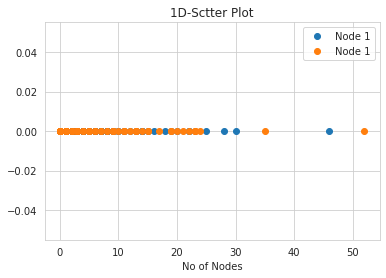

In [70]:
import numpy as np
haberman_node_1 = data.loc[data["status"] == 1];
haberman_node_2 = data.loc[data["status"] == 2];

plt.plot(haberman_node_1["nodes"], np.zeros_like(haberman_node_1["nodes"]), 'o', label = "Node 1")
plt.plot(haberman_node_2["nodes"], np.zeros_like(haberman_node_2["nodes"]), 'o', label = "Node 1")

plt.title("1D-Sctter Plot")
plt.xlabel("No of Nodes")

plt.legend()
plt.show()

#in the below plot, we can see there is a complete overlapp of status 1 and 2 and tough to get any conclusion from it

**2.Histograms**

**Histogram of Nodes**

Text(0.5, 1.0, 'Histogram for Nodes')

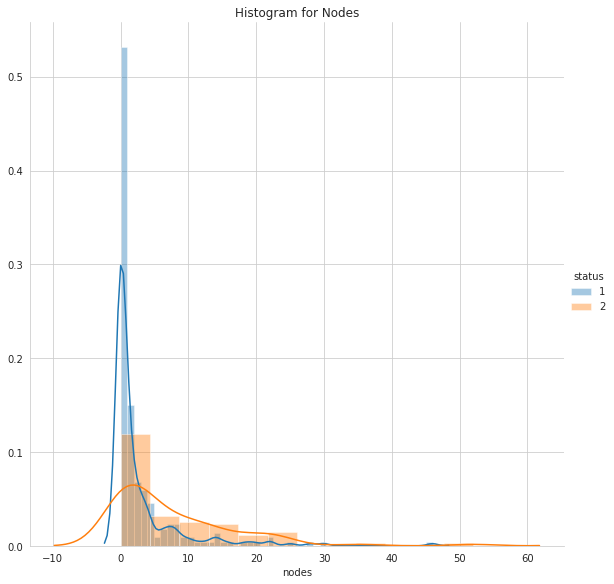

In [64]:
sns.FacetGrid(data,hue="status", size=8)\
.map(sns.distplot,"nodes")\
.add_legend()
plt.title("Histogram for Nodes")

In [0]:
# It's very clearl that the person with less no of nodes lives more 
# to be more precise in graph if the nodes <=0 they live long
# 0 <= nodes < 4(approx) , chances of living are high
# nodes > 4, chances of living are very less

**Histogram of "AGE"**

Text(0.5, 1.0, 'Histogram for AGE')

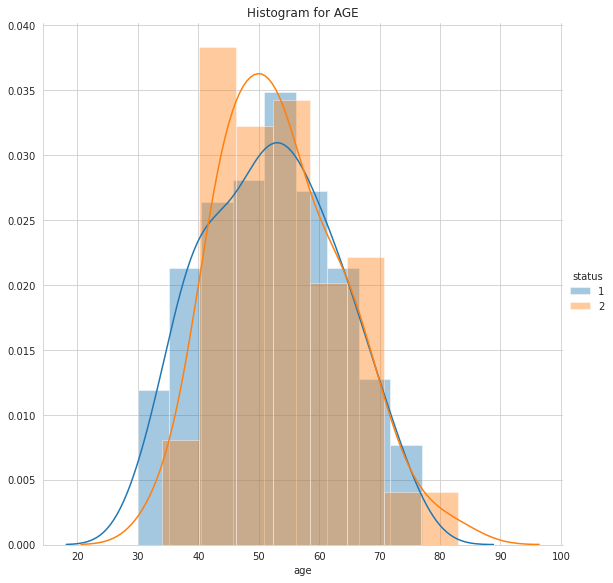

In [65]:
sns.FacetGrid(data,hue="status", size=8)\
.map(sns.distplot,"age")\
.add_legend()
plt.title("Histogram for AGE")

In [0]:
#From the above age plot what I can see is, the mortality rate and the survival rates are very much similar from 40 to 70

**Histogram of operation year**


Text(0.5, 1.0, 'Histogram for Operation Year')

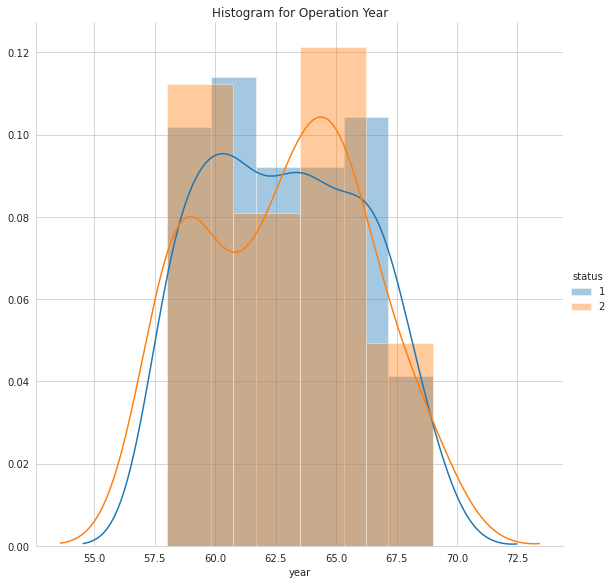

In [66]:
sns.FacetGrid(data,hue="status", size=8)\
.map(sns.distplot,"year")\
.add_legend()
plt.title("Histogram for Operation Year")

In [0]:
# Same for the above year plot as well, We can notretreive any useful information as the density is very much similar for each year

In [0]:
# From the above pdf plots we can consider the survival status, but to be little more precise we will plot the CDF with Status 1 and 2 distinctly

**CDF and PDF**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


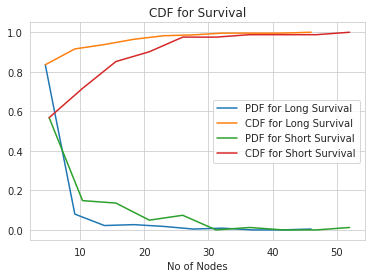

In [67]:
#printing CD and PDF for differernt survival status of 1 and 2

long_survive = data.loc[data['status'] == 1];
short_survive = data.loc[data['status'] == 2];

counts, bin_edges = np.histogram(long_survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF for Long Survival");
plt.plot(bin_edges[1:], cdf, label = "CDF for Long Survival")

counts, bin_edges = np.histogram(short_survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF for Short Survival");
plt.plot(bin_edges[1:], cdf, label = "CDF for Short Survival")

plt.xlabel("No of Nodes")
plt.title("CDF for Survival")

plt.legend()
plt.show();

In [0]:
# Orange line is CDF for long survival and Red line is for short survival

# For Long survival
#1 In the above cdf we can see there are around 83% chances of survival if the node are <= 5
#2 and at the same time the chances of survival decreases as the no of nodes increases
#3 and it's 100 % less chances of survival if the number of nodes is greater than 30

# For Short Survival
#4 the chances of survival is around 55% and it decrease rapidly
#5 and it's 100% less chances of survival when nodes are > 30

**Means**

In [0]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("WITHOUT OUTLIER: ",np.mean(data['nodes']))

#Mean with an outlier.
print("WITH OUTLIER: ",np.mean(np.append(data['nodes'],100)))
print("\nStd-dev:");

print(np.std(data['nodes']))

Means:
WITHOUT OUTLIER:  4.026143790849673
WITH OUTLIER:  4.3387622149837135

Std-dev:
7.177896092811152


In [0]:
# So we can see mean, with and without outliers doesnot differs much and the outlier has not that great effect on the mean
# and the spread of the "node" is in larger space

**Median, Percentile, Quantile, IQR, MAD**

In [0]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(data['nodes']))
#Median with an outlier
print(np.median(np.append(data['nodes'],50)));


print("\nQuantiles:")
print(np.percentile(data['nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(data['nodes'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(data['nodes']))



Medians:
1.0
1.0

Quantiles:
[0. 0. 1. 4.]

90th Percentiles:
13.0

Median Absolute Deviation
1.482602218505602


In [0]:
#Median: it's very much clear that the average nodes as 1
#Quantiles: Here 50% nodes are less than 1 and 75% nodes less than 4 and greater than 1, and only 25% nodes greater than 4
# At 90th % ===> only 10% of  the nodes would be >13 and rest would be <13

**Box plot and Whiskers**

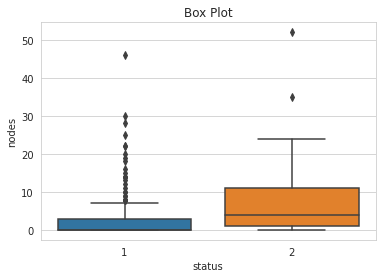

In [29]:
sns.boxplot(x='status',y='nodes', data=data)
plt.title("Box Plot")
plt.show()

In [0]:
#In the above graph the for Status 1, 
# 25th and 50th percentile are same as 0 
# 75th percentile = 3 or 4
# it's max and min values ranges between 0 to 7
#For Status 2, 
# 50 percentile of node are same as it is of Status 1 
# 25th percentile = 1(approx), 75th percentile = 12
# it's max and min values ranges between 0 to 25

**Violin plots**

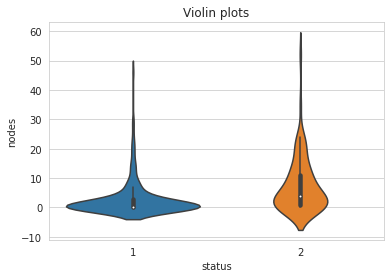

In [32]:
sns.violinplot(x="status", y="nodes", data=data, size=8)
plt.title("Violin plots")
plt.show()

In [0]:
# Violin plots
# The observation would be same, only thing differs is that it is wider where the density of the data points is larger
# for Status 1, most of the data points are spread around 0 and whiskers ranges from 0 to 7
# for Status 2, most of the data points are spread over 0 to 10 and whiskers ranges from 0 to 25 

**Contour**

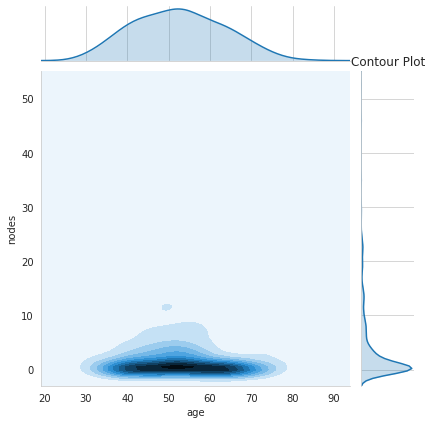

In [34]:
sns.jointplot(x="age", y="nodes", data=data, kind="kde");
plt.title("Contour Plot")
plt.show();

In [0]:
# In the above plot we can clearly see the density of survival is higher in the age range of 43 to 63 (approx)
# and the nodes range would be 0-2

**Conclusion**

In [0]:
# We can definitely diagnose cancer through this dataset by applying different EDA techniques 
# but what I feel is, it would be great if we can have few more features(that will be helpful to diagnose cancer) so that we can analyse it more 
# and give the more accurate results